# Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import missingno as msno
import warnings

from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, roc_auc_score
from sklearn.linear_model import LogisticRegression,  LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
import numpy as np
from matplotlib.ticker import FormatStrFormatter

# Открытие датасетов

In [2]:
df_ses = pd.read_csv('data/ga_sessions.csv', low_memory=False)
df_hits = pd.read_csv('data/ga_hits-001.csv')


# Объединение датасетов

In [3]:
df_all = pd.merge(df_ses, df_hits, on=["session_id"])
df_all

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,...,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,2021-11-24,3665.0,3,event,NaN,podpiska.sberauto.com/,sub_page_view,sub_landing,NaN,NaN
1,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,2021-11-24,46592.0,4,event,NaN,podpiska.sberauto.com/,sub_button_click,sub_view_cars_click,vodKSlUobUWTVlgsJqdI,NaN
2,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,...,2021-11-14,921.0,3,event,NaN,podpiska.sberauto.com/,sub_page_view,sub_landing,NaN,NaN
3,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,2021-12-28,84155.0,10,event,NaN,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region,KWTCzSIXzoqUWjfUQMgP,NaN
4,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,2021-12-28,102979.0,13,event,NaN,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region,CBqnBQaKoQUyWJhLcxxN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15685214,9055430416266113553.1640968742.1640968742,2108381692.1640968721,2021-12-31,19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,oKjXDUsycmahkgMhGdAR,...,2021-12-31,33010.0,11,event,NaN,sberauto.com/cars/all/bmw/3-serii/bde2c9d5?utm...,card_web,view_card,NaN,NaN
15685215,9055430416266113553.1640968742.1640968742,2108381692.1640968721,2021-12-31,19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,oKjXDUsycmahkgMhGdAR,...,2021-12-31,34694.0,16,event,NaN,sberauto.com/cars/all/bmw/3-serii/bde2c9d5?utm...,card_web,view_new_card,NaN,NaN
15685216,9055430416266113553.1640968742.1640968742,2108381692.1640968721,2021-12-31,19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,oKjXDUsycmahkgMhGdAR,...,2021-12-31,250.0,3,event,NaN,sberauto.com/cars/all/mercedes-benz/e-klasse/d...,card_web,view_card,NaN,NaN
15685217,9055430416266113553.1640968742.1640968742,2108381692.1640968721,2021-12-31,19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,oKjXDUsycmahkgMhGdAR,...,2021-12-31,33533.0,14,event,NaN,sberauto.com/cars/all/bmw/3-serii/bde2c9d5?utm...,card_web,view_card,NaN,NaN


# Data Preparation

In [4]:
df_clean_all = df_all.copy()

 Ищем незаполненные и пустые колонки в датасете

<AxesSubplot:>

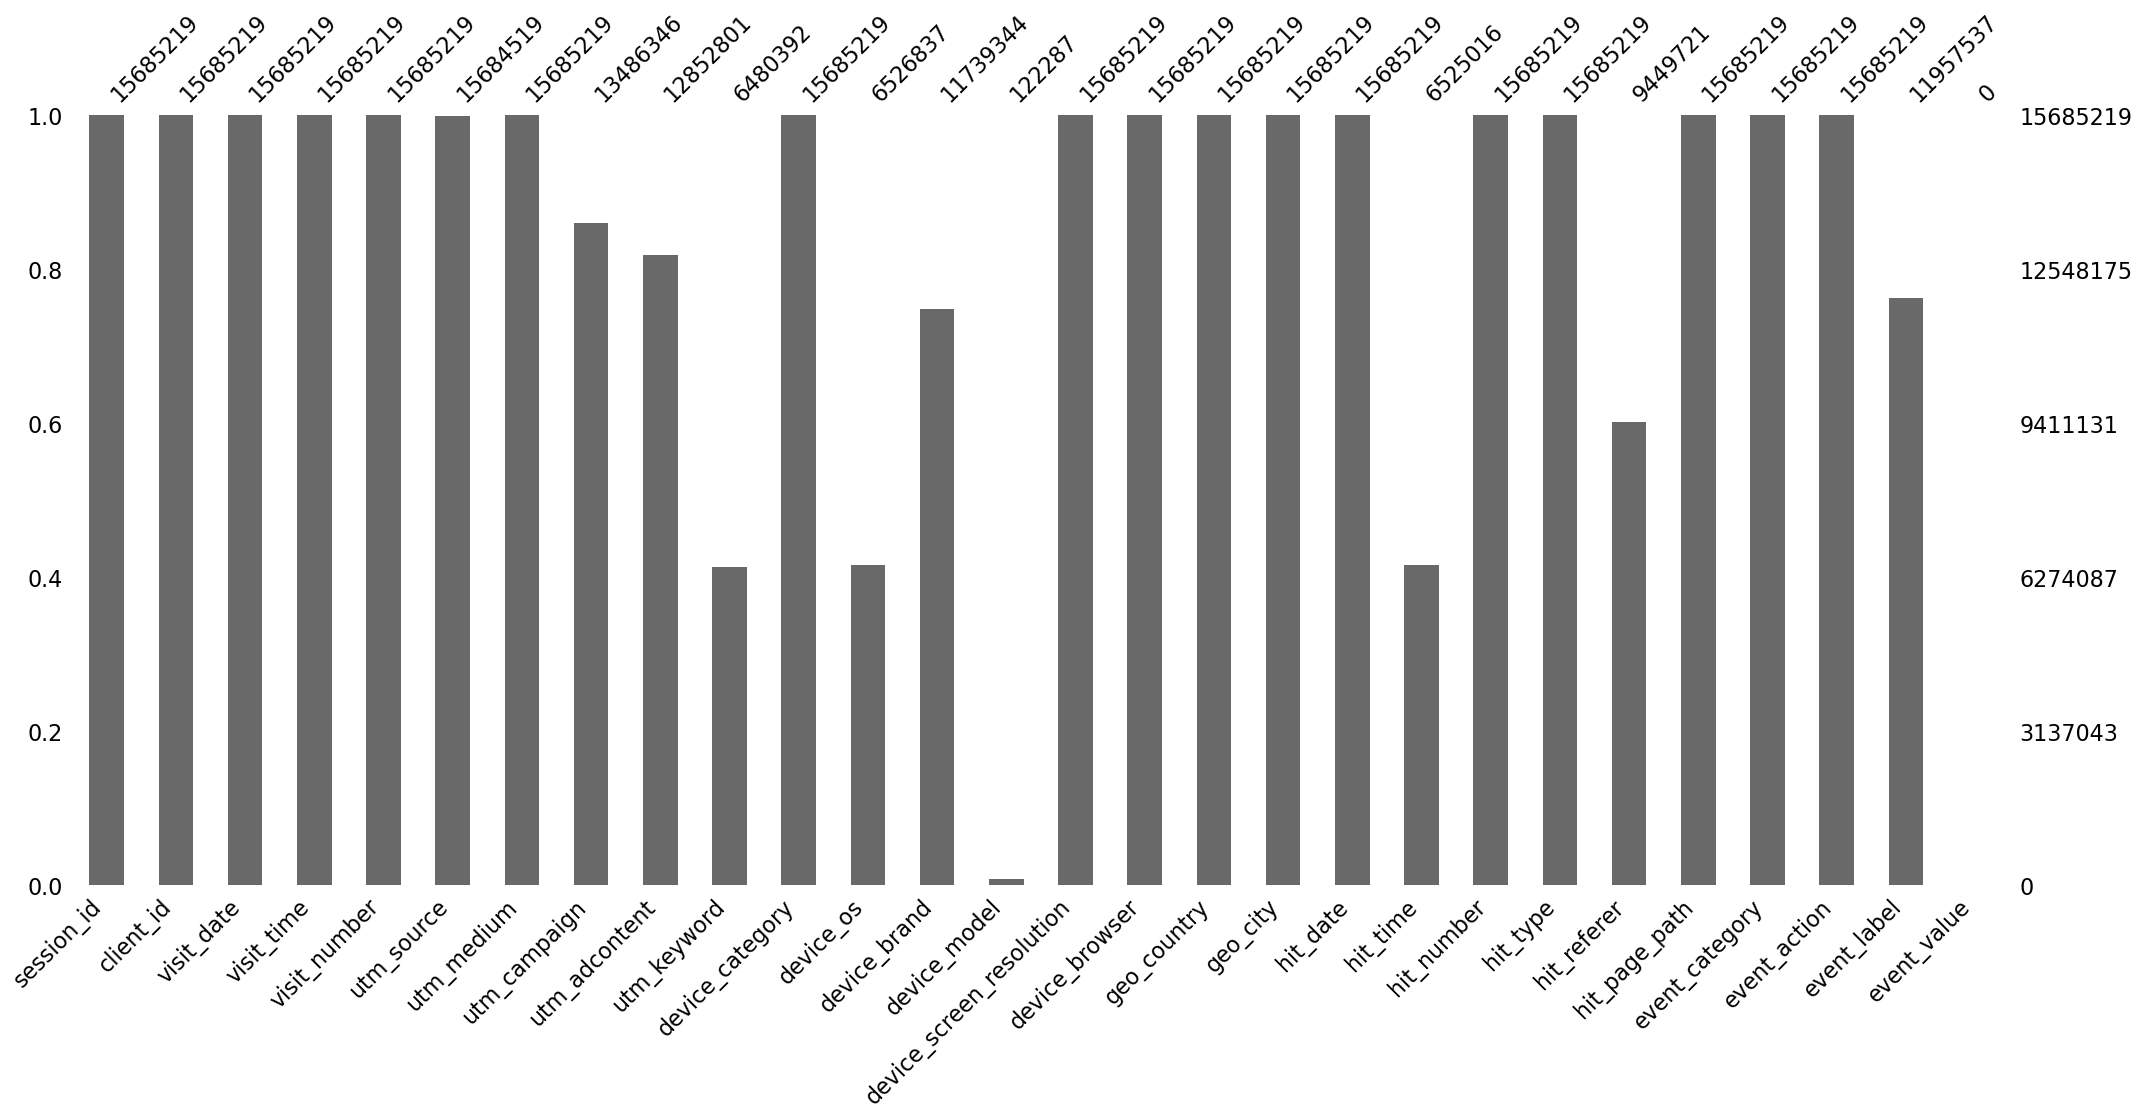

In [5]:
msno.bar(df_clean_all)

In [6]:
missing_values = ((df_clean_all.isna().sum() / len(df_clean_all)) * 100).sort_values()
missing_values

session_id                    0.000000
hit_page_path                 0.000000
hit_type                      0.000000
hit_number                    0.000000
hit_date                      0.000000
geo_city                      0.000000
geo_country                   0.000000
device_browser                0.000000
device_screen_resolution      0.000000
event_category                0.000000
event_action                  0.000000
utm_medium                    0.000000
visit_number                  0.000000
visit_time                    0.000000
visit_date                    0.000000
client_id                     0.000000
device_category               0.000000
utm_source                    0.004463
utm_campaign                 14.018759
utm_adcontent                18.057880
event_label                  23.765572
device_brand                 25.156646
hit_referer                  39.753975
device_os                    58.388614
hit_time                     58.400224
utm_keyword              

 Удаляем пустые, ненужные или сложнозаполняемые колонки

In [7]:
col_drop = {'event_value', 'event_label', 'hit_referer','device_model', 'hit_type',
           'event_label', 'hit_time', 'visit_time', 'hit_date', 'hit_number', 'hit_date','hit_page_path', 'event_category',}
df_clean_all = df_clean_all.drop(col_drop, axis=1)


Ищем таргетные значения и удаляем дубликаты

In [8]:
find_list =  ['sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click']
df_clean_all['target'] =  df_clean_all.apply(lambda x: 1 if x.event_action in find_list else 0, axis=1)
df_clean_all = df_clean_all.drop('event_action', axis=1)
df_clean_all = df_clean_all.drop_duplicates()
df_clean_all

,session_id,client_id,visit_date,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,0
2,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,0
3,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0
19,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow,0
22,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15685150,9055415581448263752.1640159305.1640159305,2108378238.1640159304,2021-12-22,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,VlqBmecIOXWjCWUmQkLd,desktop,Windows,NaN,1920x1080,Chrome,Russia,Moscow,0
15685152,9055421130527858185.1622007305.1622007305,2108379530.1622007305,2021-05-26,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,390x844,Safari,Russia,Stavropol,0
15685163,9055422955903931195.1636979515.1636979515,2108379955.1636979515,2021-11-15,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,375x667,Safari,Russia,Moscow,0
15685204,905543020766873816.1638189404.1638189404,210838164.1638189272,2021-11-29,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x851,Chrome,Russia,Chelyabinsk,0


In [9]:
stats = df_clean_all.groupby(['utm_adcontent','target']).agg({'target':'count'})
stats

target
utm_adcontent        target        
AByCsfZNGxnFrQkYzVAq 0           33
AIONnJpjXjEluFHEjOyg 0          575
                     1           20
AREbWGOhRGJXAffGqZTc 0           80
                     1            1
...                             ...
zEHnFIjqNyjvDvXKeMqx 0          247
                     1            3
zQEFTgQvqExfbldEpotc 0            1
zjrfBVIiQQBGguNcgGog 0            2
zpkCOCjptAAOxrlaKYsq 0           43

[391 rows x 1 columns]

In [10]:
stats = df_clean_all.groupby(['utm_adcontent'], as_index=False)[['client_id']].count()
stats

,utm_adcontent,client_id
0,AByCsfZNGxnFrQkYzVAq,33
1,AIONnJpjXjEluFHEjOyg,595
2,AREbWGOhRGJXAffGqZTc,81
3,AbzcnvSMiZVQpjoceeKU,275
4,AdeErYgVTbRcAWtHrMHq,5594
...,...,...
275,ywScCjfXuJyLkJMzfjEB,18
276,zEHnFIjqNyjvDvXKeMqx,250
277,zQEFTgQvqExfbldEpotc,1
278,zjrfBVIiQQBGguNcgGog,2


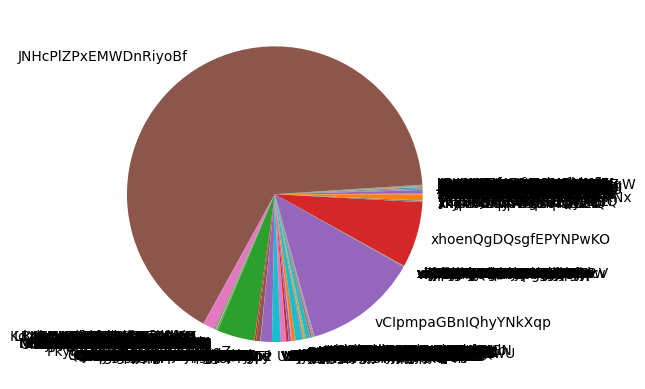

In [11]:
plt.pie(stats['client_id'], labels=stats['utm_adcontent'])
plt.show();

In [12]:
df_new = df_clean_all.copy()
l = []
for _ in range(5):
    print(df_new.utm_adcontent.mode()[0])
    l.append(df_new.utm_adcontent.mode()[0])
    df_new = df_new.loc[df_new['utm_adcontent'] != df_new.utm_adcontent.mode()[0]]
df_new = df_clean_all.loc[df_clean_all['utm_adcontent'].isin(l)]
stats = df_new.groupby(['utm_adcontent'], as_index=False)[['client_id']].count()
stats

JNHcPlZPxEMWDnRiyoBf
vCIpmpaGBnIQhyYNkXqp
xhoenQgDQsgfEPYNPwKO
PkybGvWbaqORmxjNunqZ
LLfCasrxQzJIyuldcuWy


,utm_adcontent,client_id
0,JNHcPlZPxEMWDnRiyoBf,968986
1,LLfCasrxQzJIyuldcuWy,18208
2,PkybGvWbaqORmxjNunqZ,59997
3,vCIpmpaGBnIQhyYNkXqp,183341
4,xhoenQgDQsgfEPYNPwKO,105628


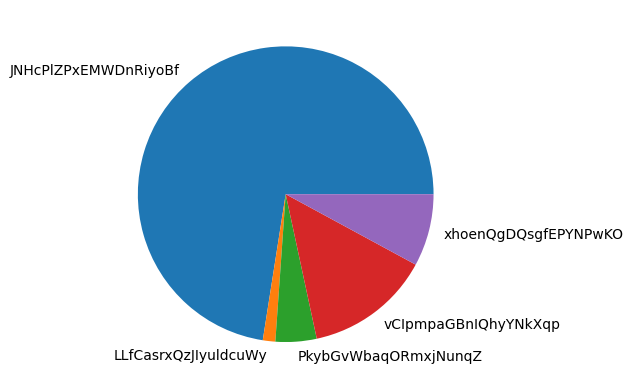

In [13]:
plt.pie(stats['client_id'], labels=stats['utm_adcontent'])
plt.show();

In [14]:
df_clean_all = df_new.copy()

In [15]:
missing_values = ((df_clean_all.isna().sum() / len(df_clean_all)) * 100).sort_values()
missing_values

session_id                   0.000000
geo_country                  0.000000
device_browser               0.000000
device_screen_resolution     0.000000
device_category              0.000000
geo_city                     0.000000
utm_adcontent                0.000000
target                       0.000000
utm_medium                   0.000000
visit_number                 0.000000
visit_date                   0.000000
client_id                    0.000000
utm_source                   0.003143
utm_campaign                 0.870854
device_brand                15.214944
device_os                   55.620060
utm_keyword                 55.671027
dtype: float64

In [16]:
df_clean_all.target.value_counts()

0    1295964
1      40196
Name: target, dtype: int64

In [17]:
l = ['geo_city', 'geo_country', 'device_browser', 'device_brand',
    'device_os','device_category','utm_medium','utm_source', 'utm_campaign', 'utm_adcontent','device_screen_resolution',]
for el in l:
    print(f'Количество уникальных занчений в {el}: {df_clean_all[el].nunique()}')

Количество уникальных занчений в geo_city: 2153
Количество уникальных занчений в geo_country: 152
Количество уникальных занчений в device_browser: 43
Количество уникальных занчений в device_brand: 182
Количество уникальных занчений в device_os: 13
Количество уникальных занчений в device_category: 3
Количество уникальных занчений в utm_medium: 45
Количество уникальных занчений в utm_source: 245
Количество уникальных занчений в utm_campaign: 187
Количество уникальных занчений в utm_adcontent: 5
Количество уникальных занчений в device_screen_resolution: 3290


In [18]:
df_clean_all['device_screen_resolution_w'] = df_clean_all.device_screen_resolution.apply(lambda x: int(x.split('x')[0]))
df_clean_all['device_screen_resolution_h'] = df_clean_all.device_screen_resolution.apply(lambda x: int(x.split('x')[1]))
df_clean_all = df_clean_all.drop('device_screen_resolution', axis=1)

In [19]:
def change_utm(df):
    df_copy = df.copy()
    l_medium = ['organic', 'referral', '(none)']
    l_add_sn = ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs',
                'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm']
    df_copy['utm_medium'] = df_copy['utm_medium'].apply(lambda x:
                                                'organic' if x in l_medium else 'inorganic')
    df_copy['utm_source'] = df_copy['utm_source'].apply(lambda x:
                                                'add_sn' if x in l_add_sn else 'not_add')
    return df_copy
df_clean_all = change_utm(df_clean_all)

In [20]:
k = df_clean_all.device_os.isnull()
d2 = df_clean_all[k]
d2.loc[:, 'device_os'] = d2.apply(lambda x: 'iOS' if x.device_brand == 'Apple' 
                                            else ('Windows' if x.device_category == 'desktop' else 'Android'), axis=1)
df_clean_all[k] = d2

C:\Users\3bepb\AppData\Local\Temp\ipykernel_10656\4220991143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['device_os'] = d2.apply(lambda x: 'iOS' if x.device_brand == 'Apple'


In [ ]:
df_clean_all['utm_keyword'] = df_clean_all['utm_keyword'].fillna(df_clean_all.utm_keyword.mode()[0])

# Feature engineering

Создание новых признаков, вместо geo_city и geo_country

In [21]:
geo_mo_set = {'Balashikha','Dedovsk','Dmitrov','Domodedovo','Ivanteyevka','Khimki','Kolomna','Krasnogorsk',
 'Lytkarino','Lyubertsy','Mytishchi','Nakhabino','Naro-Fominsk','Odintsovo','Protvino','Pushkino','Ramenskoye','Reutov',
 'Sergiyev Posad','Serpukhov','Stupino','Tomilino','Vidnoye','Voskresensk','Yegoryevsk'}
df_clean_all['its_Russia'] = df_clean_all.apply(lambda x: 1 if x.geo_country == 'Russia' else 0, axis=1)
df_clean_all['its_Moscow'] = df_clean_all.apply(lambda x: 1 if x.geo_city == 'Moscow' else 0, axis=1)
df_clean_all['its_Saint_Petersburg'] = df_clean_all.apply(lambda x: 1 if x.geo_city == 'Saint Petersburg' else 0, axis=1)
df_clean_all['its_MO'] = df_clean_all.apply(lambda x: 1 if x.geo_city in 'MO' else 0, axis=1)
df_clean_all = df_clean_all.drop(['geo_country', 'geo_city'], axis=1)

In [23]:
df_copy = df_clean_all.copy()
df_copy

,session_id,client_id,visit_date,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_browser,target,device_screen_resolution_w,device_screen_resolution_h,its_Russia,its_Moscow,its_Saint_Petersburg,its_MO
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,1,not_add,inorganic,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,Chrome,0,360,720,1,0,0,0
2,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,1,add_sn,inorganic,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,Samsung Internet,0,385,854,1,1,0,0
3,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,1,not_add,inorganic,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,Chrome,0,360,720,1,0,0,0
24,9055447192389856083.1622453074.1622453074,2108385598.1622453075,2021-05-31,1,not_add,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,Safari,0,375,812,1,0,1,0
89,9055461992850812764.1626107740.1626107740,2108389044.1626107740,2021-07-12,1,not_add,inorganic,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,Chrome,0,360,640,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15685125,9055394342833425189.1638599463.1638599463,2108373293.1638599461,2021-12-04,1,not_add,inorganic,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,Chrome,0,384,854,1,0,0,0
15685148,9055397194683347295.1630237022.1630237022,2108373957.1630237023,2021-08-29,1,add_sn,inorganic,zfwIehuEfWYdYrEZgRLo,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,Safari,0,414,896,1,0,0,0
15685152,9055421130527858185.1622007305.1622007305,2108379530.1622007305,2021-05-26,1,not_add,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,Safari,0,390,844,1,0,0,0
15685163,9055422955903931195.1636979515.1636979515,2108379955.1636979515,2021-11-15,1,not_add,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,Safari,0,375,667,1,1,0,0


стандартизация и нормализация в visit_date

In [24]:
df_copy['visit_date'] = pd.to_datetime(df_copy['visit_date'], utc=True)
df_copy['visit_day'] = df_copy.visit_date.dt.day
df_copy['visit_dayofweek'] = df_copy.visit_date.dt.day_of_week
df_copy['visit_month'] = df_copy.visit_date.dt.month
date_std = StandardScaler()
date_std.fit(df_copy[['visit_month','visit_dayofweek', 'visit_day',
                      'device_screen_resolution_w','device_screen_resolution_h']])
date_matrix = date_std.transform(df_copy[['visit_month','visit_dayofweek', 'visit_day',
                      'device_screen_resolution_w','device_screen_resolution_h']])
df_copy[['visit_month_std','visit_dayofweek_std', 'visit_day_std',
         'device_screen_resolution_w_std','device_screen_resolution_h_std']] = date_matrix
df_copy.head()
df_copy = df_copy.drop(['visit_month','visit_dayofweek', 'visit_day', 'visit_date',
                        'device_screen_resolution_w','device_screen_resolution_h'], axis=1)

In [27]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306899 entries, 0 to 15685204
Data columns (total 22 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   session_id                      1306899 non-null  object 
 1   client_id                       1306899 non-null  object 
 2   visit_number                    1306899 non-null  int64  
 3   utm_source                      1306899 non-null  object 
 4   utm_medium                      1306899 non-null  object 
 5   utm_campaign                    1295486 non-null  object 
 6   utm_adcontent                   1306899 non-null  object 
 7   utm_keyword                     1306899 non-null  object 
 8   device_category                 1306899 non-null  object 
 9   device_os                       1306899 non-null  object 
 10  device_brand                    1120312 non-null  object 
 11  device_browser                  1306899 non-null  object 
 12 

In [28]:
df_copy.target.value_counts()

0    1267934
1      38965
Name: target, dtype: int64

In [29]:
df_ohe = df_copy.copy()

подготовка категориальных переменных с помощью OneHotEncoder

In [30]:
data_list = [ 'device_os', 'device_brand', 'device_browser','device_os','device_category',
             'utm_source', 'utm_medium', 'utm_adcontent','utm_campaign','utm_keyword', 'visit_number']
data = df_copy[data_list]
ohe = OneHotEncoder(sparse=False)
ohe.fit(data)
ohe_matrix = ohe.transform(data)
warnings.filterwarnings('ignore')
df_ohe[ohe.get_feature_names_out()] = ohe_matrix
df_ohe

,session_id,client_id,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,...,visit_number_1,visit_number_2,visit_number_3,visit_number_4,visit_number_5,visit_number_6,visit_number_7,visit_number_8,visit_number_9,visit_number_10
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,1,not_add,inorganic,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,905544597018549464.1636867290.1636867290,210838531.1636867288,1,add_sn,inorganic,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9055446045651783499.1640648526.1640648526,2108385331.1640648523,1,not_add,inorganic,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,9055447192389856083.1622453074.1622453074,2108385598.1622453075,1,not_add,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,9055461992850812764.1626107740.1626107740,2108389044.1626107740,1,not_add,inorganic,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15685125,9055394342833425189.1638599463.1638599463,2108373293.1638599461,1,not_add,inorganic,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15685148,9055397194683347295.1630237022.1630237022,2108373957.1630237023,1,add_sn,inorganic,zfwIehuEfWYdYrEZgRLo,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15685152,9055421130527858185.1622007305.1622007305,2108379530.1622007305,1,not_add,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15685163,9055422955903931195.1636979515.1636979515,2108379955.1636979515,1,not_add,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
col_drop = ['device_os', 'device_brand', 'device_browser','device_os','device_category','utm_adcontent','utm_campaign',
             'utm_source', 'utm_medium', 'utm_keyword',
            'session_id','visit_number', 'client_id']
df_ohe = df_ohe.drop(col_drop, axis=1)

In [32]:
df_ohe

,target,its_Russia,its_Moscow,its_Saint_Petersburg,its_MO,visit_month_std,visit_dayofweek_std,visit_day_std,device_screen_resolution_w_std,device_screen_resolution_h_std,...,visit_number_1,visit_number_2,visit_number_3,visit_number_4,visit_number_5,visit_number_6,visit_number_7,visit_number_8,visit_number_9,visit_number_10
0,0,1,0,0,0,0.727323,-0.384092,0.771231,-0.472233,-0.583953,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,0,0,0.727323,1.610232,-0.363576,-0.421088,0.167649,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,0,1.164794,-0.882674,1.225154,-0.472233,-0.583953,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0,1,0,1,0,-1.897506,-1.381255,1.565596,-0.441546,-0.067928,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,0,1,0,1,0,-1.022563,-1.381255,-0.590537,-0.472233,-1.032671,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15685125,0,1,0,0,0,1.164794,1.111651,-1.498383,-0.423134,0.167649,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15685148,0,1,0,0,0,-0.585091,1.610232,1.338635,-0.361760,0.403226,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15685152,0,1,0,0,0,-1.897506,-0.384092,0.998193,-0.410859,0.111560,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15685163,0,1,1,0,0,0.727323,-1.381255,-0.250095,-0.441546,-0.881229,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
x = df_ohe.drop(['target'], axis=1)
y = df_ohe['target']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, stratify=y)

# Modelling

In [34]:
random_clf = RandomForestClassifier(random_state = 42).fit(x_train, y_train)
random_pred = random_clf.predict(x_test)
proba_x = random_clf.predict_proba(x_test)
print(f'Accuracy Score: {accuracy_score(y_test, random_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, random_pred)}')
print(f'Roc Auc: {roc_auc_score(y_test, proba_x[:,1])}')

Accuracy Score: 0.9620271890223685
Confusion Matrix:
 [[377170   3210]
 [ 11678     12]]
Roc Auc: 0.537166163043206


In [35]:
log_reg = LogisticRegression(class_weight='balanced',random_state= 42).fit(x_train, y_train)
proba_x = log_reg.predict_proba(x_test)
logreg_pred = log_reg.predict(x_test)
print(f'Accuracy Score: {accuracy_score(y_test, logreg_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, logreg_pred)}')
print(f'Roc Auc: {roc_auc_score(y_test, proba_x[:,1])}')

Accuracy Score: 0.5988267401229372
Confusion Matrix:
 [[227199 153181]
 [  4107   7583]]
Roc Auc: 0.6691157352395029


In [ ]:
mlp = MLPClassifier(random_state=42).fit(x_train,y_train)
mlp_pred = mlp.predict(x_test)
proba_x = mlp.predict_proba(x_test)
print(f'Accuracy Score: {accuracy_score(y_test, mlp_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, mlp_pred)}')
print(f'Roc Auc: {roc_auc_score(y_test, proba_x[:,1])}')